In [2]:
import numpy as np
import cv2
from scipy.signal import convolve2d

In [154]:
def conv(img, filtr, mode='same'):
    res = convolve2d(img, filtr, mode=mode)
    
    res_ = res.copy()
    res_[res_ < 0] = 0
    
    return res_


In [3]:
sobel_y = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1],
])

sobel_x= np.array([
    [-1, -2, 1],
    [0, 0, 0],
    [-1, 2, 1]
])

In [4]:
img = cv2.cvtColor( cv2.imread('../lena.png'), cv2.COLOR_BGR2GRAY)

In [5]:
import matplotlib.pyplot as plt

In [6]:
plt.gray()

<Figure size 432x288 with 0 Axes>

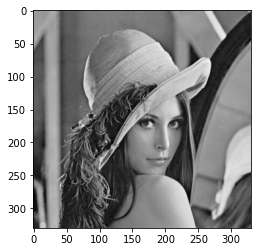

In [7]:
plt.imshow(img)

In [8]:
img.shape

(330, 330)

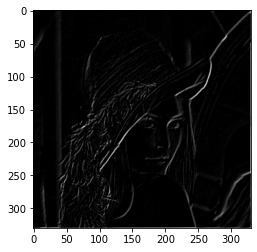

In [141]:
img_conv_x = conv(img, sobel_x)
plt.imshow(img_conv_x)

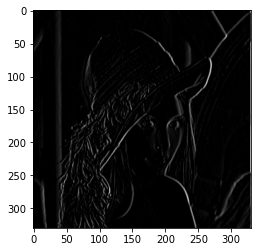

In [145]:
img_conv_y = conv(img, sobel_y)
img_conv_y=  conv(img, sobel_y)
plt.imshow(img_conv_y)

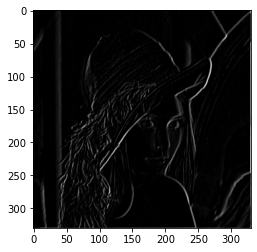

In [147]:
g = np.abs( img_conv_x) + np.abs(img_conv_y)
plt.imshow(g)

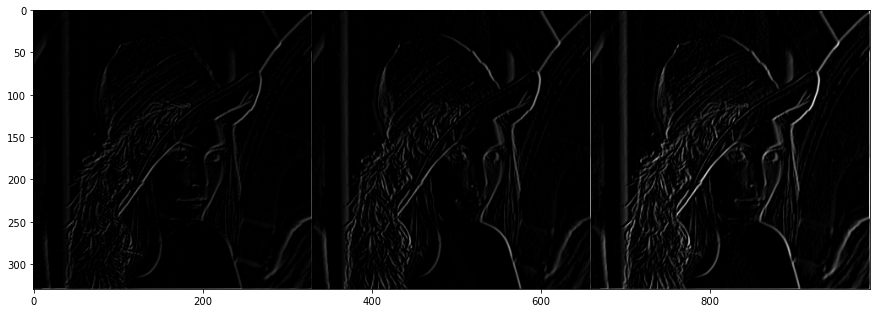

In [149]:
plt.figure(figsize=(15, 15))

plt.imshow(np.hstack([img_conv_x, img_conv_y, g]))

In [17]:
from scipy.ndimage import convolve

In [18]:
lap_f = np.array([
    [1,1,1],
    [1,-8,1],
    [1,1,1],
])

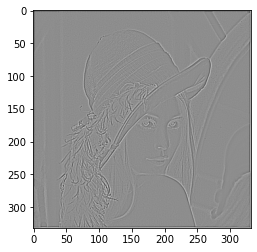

In [19]:
img_conv_lap_f = convolve2d(img, lap_f)
plt.imshow(img_conv_lap_f)

In [20]:
np.sum(img_conv_lap_f)

0

In [21]:
img_1 = cv2.cvtColor( cv2.imread('./1.png'), cv2.COLOR_BGR2GRAY)

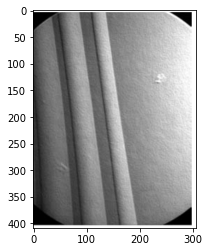

In [22]:
plt.imshow(img_1)

In [23]:
from sklearn.preprocessing import MinMaxScaler

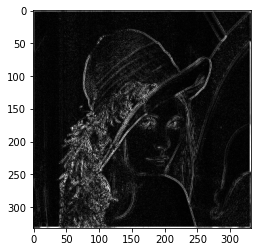

In [24]:
res = convolve2d(img, lap_f)

plt.imshow(MinMaxScaler(feature_range=(0, 255)).fit_transform(np.abs(res)))

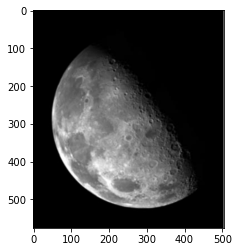

In [25]:
moon_img = cv2.cvtColor( cv2.imread('./moon.png'), cv2.COLOR_BGR2GRAY)
plt.imshow(moon_img)

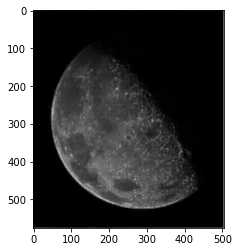

In [26]:
res2 = convolve2d(moon_img, lap_f, mode='same')

plt.imshow(moon_img + MinMaxScaler(feature_range=(0, 255)).fit_transform(np.abs(res2)))

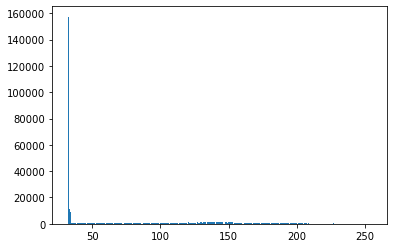

In [27]:
plt.hist(moon_img.ravel(), bins=256);

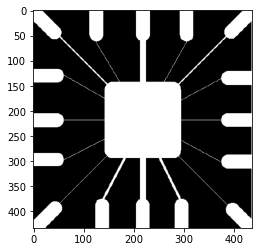

In [28]:
chip_img = cv2.cvtColor( cv2.imread('./chip.png'), cv2.COLOR_BGR2GRAY)

plt.imshow(chip_img)

In [29]:
chip_gx = convolve2d(chip_img, sobel_x)
chip_gy = convolve2d(chip_img, sobel_y)

In [30]:
plt.gray()

<Figure size 432x288 with 0 Axes>

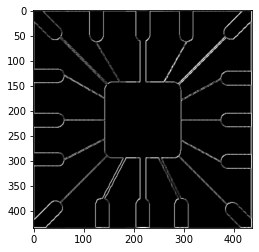

In [31]:
# plt.imshow(chip_gx)

plt.imshow(MinMaxScaler(feature_range=(0, 255)).fit_transform(np.abs(chip_gx)))

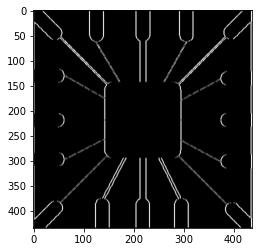

In [32]:
# plt.imshow(chip_gy)

plt.imshow(MinMaxScaler(feature_range=(0, 255)).fit_transform(np.abs(chip_gy)))

In [33]:
chip_g = abs(chip_gx) + abs(chip_gy)

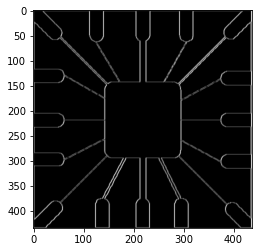

In [34]:
plt.imshow(chip_g)

In [35]:
f_45 = np.array([
    [2,-1,-1],
    [-1,2,-1],
    [-1,-1,2],
])

f_minus_45 = np.array([
    [-1,-1,2],
    [-1,2,-1],
    [2,-1,-1],
])

In [36]:
res_f_45 = convolve2d(chip_img, f_45)
res_f_minus_45 = convolve2d(chip_img, f_minus_45)

In [37]:
_, res_f_45_t = cv2.threshold(res_f_45.astype(np.float32), 254, 255, cv2.THRESH_BINARY)
_, res_f_minus_45_t = cv2.threshold(res_f_minus_45.astype(np.float32), 127, 255, cv2.THRESH_BINARY)

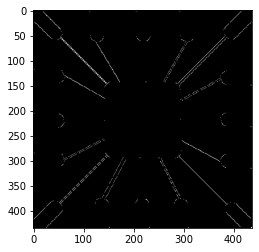

In [38]:
plt.imshow(res_f_45_t)

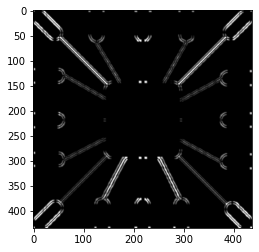

In [39]:
res_f_45_gblur = cv2.GaussianBlur(res_f_45.astype(np.float32), (5,5), 2)


plt.imshow(MinMaxScaler(feature_range=(0, 255)).fit_transform(np.abs(res_f_45_gblur)))

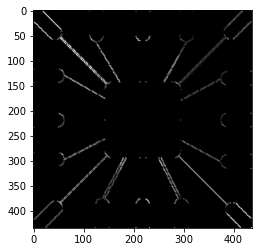

In [40]:
plt.imshow(MinMaxScaler(feature_range=(0, 255)).fit_transform(np.abs(res_f_45)))

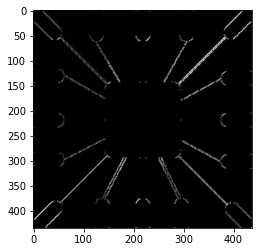

In [41]:
plt.imshow(MinMaxScaler(feature_range=(0, 255)).fit_transform(np.abs(res_f_minus_45)))

In [42]:
f_weird = np.array([
    [2,2,-1],
    [-1,-1,2],
    [-1,-1,-1],
])


In [43]:
sobel_y

array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])

In [44]:
sobel_x

array([[-1, -2,  1],
       [ 0,  0,  0],
       [-1,  2,  1]])

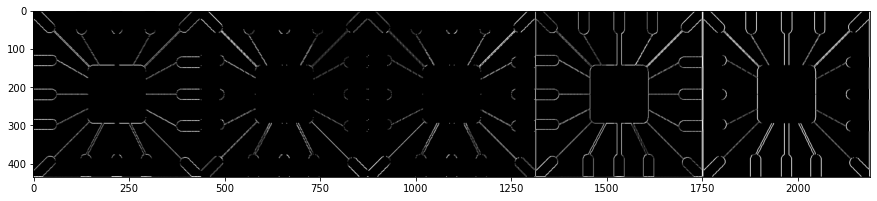

In [45]:
plt.figure(figsize=(15, 15))

res1 = MinMaxScaler(feature_range=(0, 255)).fit_transform(np.abs(convolve2d(chip_img, f_weird)))
res2 = MinMaxScaler(feature_range=(0, 255)).fit_transform(np.abs(convolve2d(chip_img, f_45)))
res3 = MinMaxScaler(feature_range=(0, 255)).fit_transform(np.abs(convolve2d(chip_img, f_minus_45)))
res4 = MinMaxScaler(feature_range=(0, 255)).fit_transform(np.abs(convolve2d(chip_img, sobel_x)))
res5 = MinMaxScaler(feature_range=(0, 255)).fit_transform(np.abs(convolve2d(chip_img, sobel_y)))

plt.imshow(np.hstack([res1, res2, res3, res4, res5]))

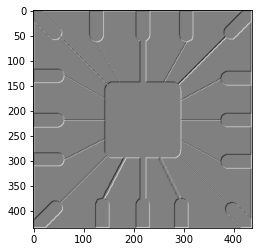

In [49]:
plt.imshow(chip_gx)

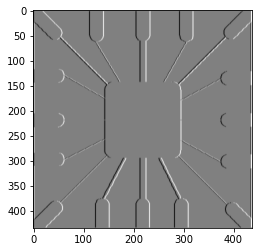

In [50]:
plt.imshow(chip_gy)

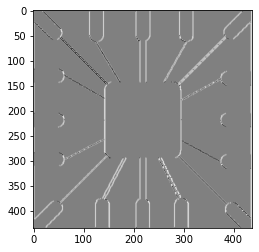

In [54]:
alpha = np.arctan(chip_gy / (chip_gx + 0.00001))

plt.imshow(alpha)

In [77]:
img1 = np.array([
    [1,1,1,1,1,1],
    [0,1,1,1,1,1],
    [0,0,1,1,1,1],
    [0,0,0,1,1,1],
    [0,0,0,0,1,1],
    [0,0,0,0,0,1]
])


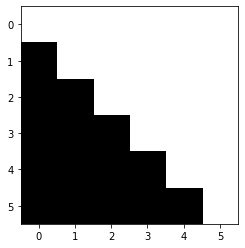

In [78]:
plt.imshow(img1)

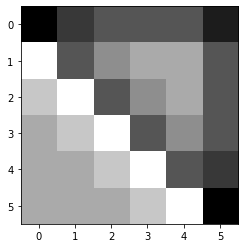

In [79]:
res = convolve2d(img1, lap_f, mode='same')

plt.imshow(res)

In [80]:
res

array([[-6, -4, -3, -3, -3, -5],
       [ 3, -3, -1,  0,  0, -3],
       [ 1,  3, -3, -1,  0, -3],
       [ 0,  1,  3, -3, -1, -3],
       [ 0,  0,  1,  3, -3, -4],
       [ 0,  0,  0,  1,  3, -6]])

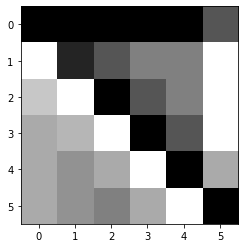

In [81]:
res_scaled = MinMaxScaler((0, 255)).fit_transform(res)

plt.imshow(res_scaled)

In [75]:
res_scaled

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  85.        ],
       [255.        ,  36.42857143,  85.        , 127.5       ,
        127.5       , 255.        ],
       [198.33333333, 255.        ,   0.        ,  85.        ,
        127.5       , 255.        ],
       [170.        , 182.14285714, 255.        ,   0.        ,
         85.        , 255.        ],
       [170.        , 145.71428571, 170.        , 255.        ,
          0.        , 170.        ],
       [170.        , 145.71428571, 127.5       , 170.        ,
        255.        ,   0.        ]])

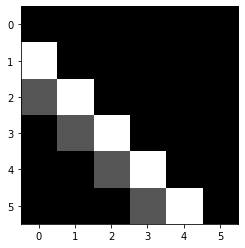

In [82]:
res2 = res.copy()
res2[res2 < 0] = 0

plt.imshow(res2)

In [104]:
img1_sob_x = convolve2d(img1, sobel_x, mode='same')
img1_sob_y = convolve2d(img1, sobel_y, mode='same')


img1_sob_x_ = img1_sob_x.copy()
img1_sob_y_ = img1_sob_y.copy()

img1_sob_x_[img1_sob_x_ < 0 ] = 0
img1_sob_y_[img1_sob_y_ < 0 ] = 0

img1_sob_x = img1_sob_x_.copy()
img1_sob_y = img1_sob_y_.copy()

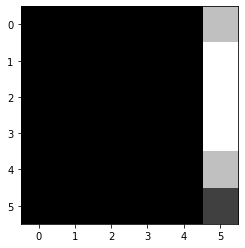

In [105]:
plt.imshow(img1_sob_y)

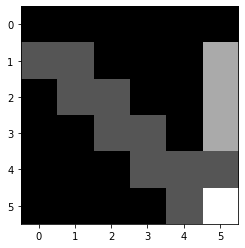

In [97]:
plt.imshow(img1_sob_x)

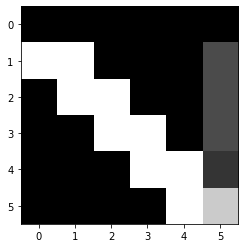

In [106]:
alpha = np.arctan(img1_sob_x / (img1_sob_y + 0.0001))
plt.imshow(alpha)

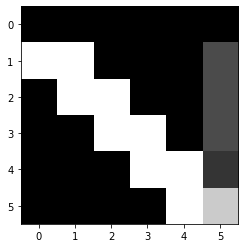

In [109]:
plt.imshow(np.rad2deg(alpha))

In [110]:
f_y_1d = np.array([
    [-1],
    [1]
])

f_x_1d = np.array([
    [-1, 1]
])

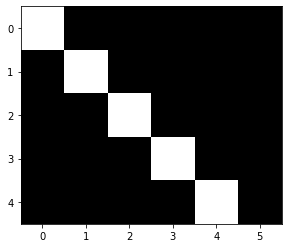

In [124]:
res_1d_y = convolve2d(img1, f_y_1d, mode='valid')

plt.imshow(res_1d_y)

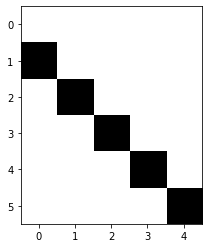

In [125]:
res_1d_x = convolve2d(img1, f_x_1d, mode='valid')

plt.imshow(res_1d_x)

In [126]:
res_1d_x

array([[ 0,  0,  0,  0,  0],
       [-1,  0,  0,  0,  0],
       [ 0, -1,  0,  0,  0],
       [ 0,  0, -1,  0,  0],
       [ 0,  0,  0, -1,  0],
       [ 0,  0,  0,  0, -1]])

In [205]:
prewitt_y = np.array([
    [-1,-1,-1],
    [0,0,0],
    [1,1,1],
])

prewitt_x = prewitt_y.T

In [206]:
px_lena = conv(img, prewitt_x)
py_lena = conv(img, prewitt_y)

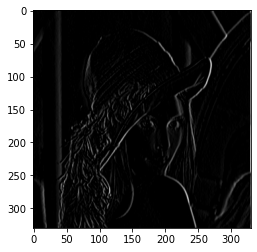

In [207]:
plt.imshow(px_lena)

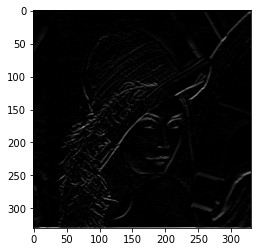

In [208]:
plt.imshow(py_lena)

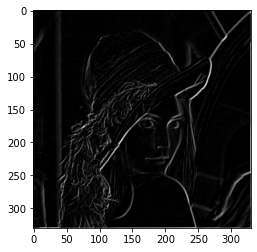

In [209]:
p_res = abs(py_lena) + abs(px_lena)

plt.imshow(p_res)

## comparison of noise suppression between Sobel and Prewitt filters

In [210]:
n0 = cv2.cvtColor( cv2.imread('./noise_0.png'), cv2.COLOR_BGR2GRAY)
n1 = cv2.cvtColor( cv2.imread('./noise_1.png'), cv2.COLOR_BGR2GRAY)
n2 = cv2.cvtColor( cv2.imread('./noise_2.png'), cv2.COLOR_BGR2GRAY)
n3 = cv2.cvtColor( cv2.imread('./noise_3.png'), cv2.COLOR_BGR2GRAY)

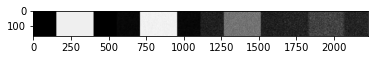

In [211]:
plt.imshow(np.hstack([n0, n1, n2, n3]))

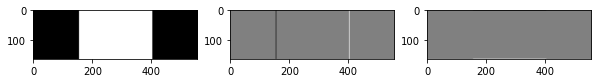

In [212]:
n0_px = convolve2d(n0, prewitt_x, mode='same')
n0_py = convolve2d(n0, prewitt_y, mode='same')

fig, ax = plt.subplots(1, 3, figsize=(10, 15))

ax[0].imshow(n0)
ax[1].imshow(n0_px)
ax[2].imshow(n0_py)

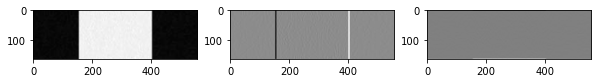

In [213]:
n1_px = convolve2d(n1, prewitt_x, mode='same')
n1_py = convolve2d(n1, prewitt_y, mode='same')

fig, ax = plt.subplots(1, 3, figsize=(10, 15))

ax[0].imshow(n1)
ax[1].imshow(n1_px)
ax[2].imshow(n1_py)

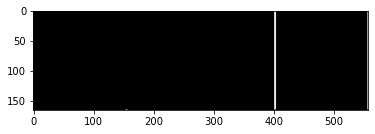

In [214]:
plt.imshow(MinMaxScaler((0, 255)).fit_transform(n0_px))

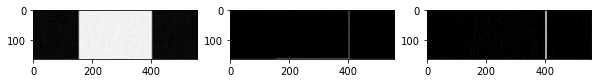

In [215]:
n1_sx = conv(n1, sobel_x)
n1_sy = conv(n1, sobel_y)

fig, ax = plt.subplots(1, 3, figsize=(10, 15))

ax[0].imshow(n1)
ax[1].imshow(n1_sx)
ax[2].imshow(n1_sy)

In [233]:
def apply_filters_to_noise(noise_img):
    n_sx = cv2.Sobel(noise_img, cv2.CV_32F, 1, 0)
    n_smotthed = cv2.GaussianBlur(n_sx, (3,3), 5)
    n_sx_smotthed = cv2.Sobel(n_smotthed, cv2.CV_32F, 1, 0)

    fig, ax = plt.subplots(1, 4, figsize=(10, 20))

    ax[0].imshow(noise_img)
    ax[1].imshow(n_sx)
    ax[2].imshow(n_smotthed)
    ax[3].imshow(n_sx_smotthed)
    

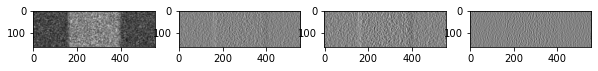

In [235]:
apply_filters_to_noise(n3)

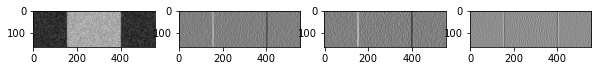

In [236]:
apply_filters_to_noise(n2)

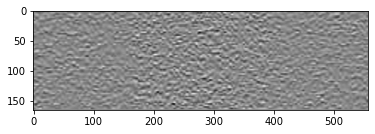

In [217]:
plt.imshow(cv2.Sobel(n3, cv2.CV_32F, 0, 1))

# Kirsch compass kernels

In [245]:
kirsch_n = np.array([
    [-3,-3,5],
    [-3,0,5],
    [-3,-3,5],
])

kirsch_nw = np.array([
    [-3,5,5],
    [-3,0,5],
    [-3,-3,-3],
])
    
kirsch_w = np.array([
    [5,5,5],
    [-3,0,-3],
    [-3,-3,-3],
])
    
kirsch_sw = np.array([
    [5,5,-3],
    [5,0,-3],
    [-3,-3,-3],
])

kirsch_s = np.array([
    [5,-3,-3],
    [5,0,-3],
    [5,-3,-3],
])

kirsch_se = np.array([
    [-3,-3,-3],
    [-3,0,5],
    [-3,5,5],
])
    
kirsch_e = np.array([
    [-3,-3,-3],
    [-3,0,-3],
    [5,5,5],
])
    
kirsch_ne = np.array([
    [-3,-3,-3],
    [-3,0,5],
    [-3,5,5],
])

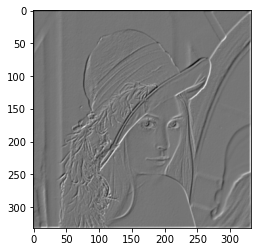

In [246]:
plt.imshow(convolve2d(img, kirsch_ne))

# combining thresholding with gridient

In [296]:
roof = cv2.cvtColor( cv2.imread('./roof.png'), cv2.COLOR_BGR2GRAY)

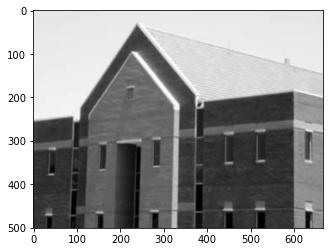

In [297]:
roof = roof / 255.0

plt.imshow(roof)

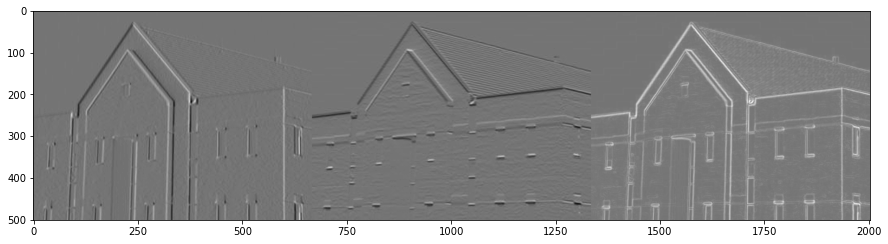

In [307]:
roof_sx = cv2.Sobel(roof, -1, 1, 0)
roof_sy = cv2.Sobel(roof, -1, 0, 1)

roof_g = abs(roof_sx) + abs(roof_sy)

plt.figure(figsize=(15, 5))
plt.imshow(np.hstack([roof_sx, roof_sy, roof_g]))

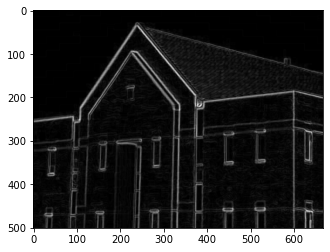

In [308]:
roof_g_ = roof_g.copy()
roof_g_[roof_g_ < 0] = 0
roof_g = roof_g_.copy()

plt.imshow(roof_g)

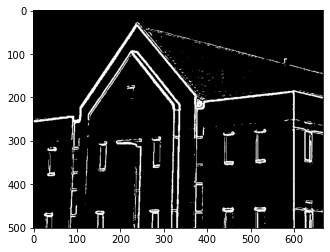

In [318]:
plt.imshow(cv2.threshold(roof_g, 0.4, 1, cv2.THRESH_BINARY)[1])

In [334]:
def calc_sobel_g(img):
    img_sx = cv2.Sobel(img, -1, 1, 0)
    img_sy = cv2.Sobel(img, -1, 0, 1)

    img_g = abs(img_sx) + abs(img_sy)

    return img_sx, img_sy, img_g

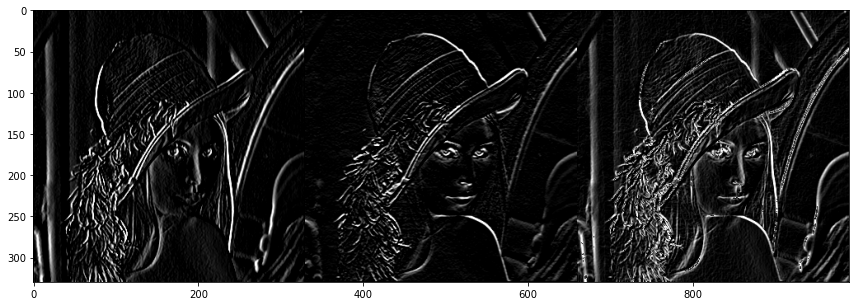

In [335]:
img_sx, img_sy, img_g = calc_sobel_g(img)

plt.figure(figsize=(15, 5))
plt.imshow(np.hstack([img_sx, img_sy, img_g]))

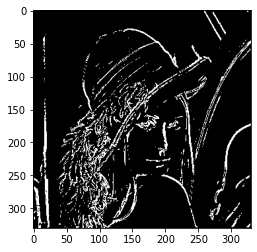

In [325]:
plt.imshow(cv2.threshold(img_g, 100, 255, cv2.THRESH_BINARY)[1])

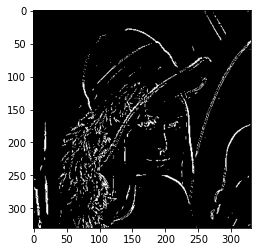

In [338]:
img_blur = cv2.GaussianBlur(img, (7, 7), 5)
img_g_blur_x, img_g_blur_y, img_g_blur = calc_sobel_g(img)


plt.imshow(cv2.threshold(img_g_blur, 150, 255, cv2.THRESH_BINARY)[1])